In [3]:
import labyrinthe 
from tqdm import tqdm

In [4]:
laby = labyrinthe.Labyrinthe (filename = 'laby.1', x = 1, y = 1)

In [5]:
laby.reset()

[1, 1]

In [6]:
import random
import numpy as np
random.seed(42)
np.random.seed(42)

In [7]:
def QLearning(lab ,eps = 1 ,gamma = 0.9 , n_iter = 100)  : 
    Q = np.zeros((lab.largeur, lab.hauteur, 5))
    n = np.zeros(( lab.largeur,lab.hauteur, 5))
    steps = []
    for i in range(n_iter): 
        s = tuple(lab.reset())
        done = False 
        t = 0 
        while  not done : 
            r = np.random.rand()
            _ , acts =  lab.possible_actions()
            arr = Q[s[0] , s[1] , : ]
            if r <= eps: 
                act = random.choice(acts)
            else : 
                probability_array = (arr/(n[s[0] , s[1] , : ]+1 ))
                probability_array_normalized = probability_array/probability_array.sum()
                act= np.argmax(probability_array_normalized)
            s_new , r , done , pas = lab.step(act)
            n_step = pas['n']
            s_new = tuple(s_new)
            # quality of current state
            q_s_a=  Q[s[0] , s[1] , act]
            
            
            # alpha 
            alpha = 1/(n[s[0] , s[1] , act]+1 )
            
            
            #quality of next_state
            q_sn_a = np.max(Q[s_new[0] , s_new[1] , :])
            
            # calculation 
            
            q = q_s_a+  1 *(r + gamma* q_sn_a - q_s_a)
            
            Q[s[0] , s[1] , act] = q 
            n[s[0] , s[1] , act] = n[s[0] , s[1] , act] + 1
            s = s_new
            t+=1 
            eps = eps * 0.98
        steps.append(n_step)
    return np.argmax(Q , axis = 2 ).T ,np.argmin(np.array(steps)) , steps


In [8]:
QLearning(laby)

<ipython-input-7-775d56668bd9>:17: RuntimeWarning: invalid value encountered in true_divide
  probability_array_normalized = probability_array/probability_array.sum()


KeyboardInterrupt: 

In [11]:
import matplotlib.pyplot as plt 

In [ ]:
random.seed(42)
np.random.seed(42)
l_1 = []
l_1_bis = []
for i in range(100):
    l_1.append(QLearning(laby)[1])
    l_1_bis.append(QLearning(laby)[2])

In [ ]:
random.seed(42)
np.random.seed(42)
l_2 = []
l_2_bis = []
for i in range(100):
    l_2.append(QLearning(laby, gamma = 0.5)[1] ) 
    l_2_bis.append(QLearning(laby, gamma = 0.5)[2])

In [ ]:
random.seed(42)
np.random.seed(42)
l_3 = []
l_3_bis = []
for i in range(100):
    l_3.append(QLearning(laby, gamma = 0.1)[1] )
    l_3_bis.append(QLearning(laby, gamma = 0.1)[2] ) 

Text(0.5, 1.0, 'Comparison of minimum number of iteration needed depending on the value of gamma for laby 1')

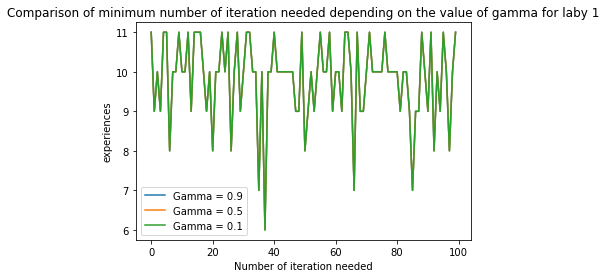

In [ ]:
plt.plot(np.arange(100) , l_1  , label = "Gamma = 0.9")
plt.plot(np.arange(100) , l_2  ,label =  "Gamma = 0.5")
plt.plot(np.arange(100) , l_3  ,label=  "Gamma = 0.1")

plt.legend()

# Add labels to x and y axes
plt.xlabel('Number of iteration needed')
plt.ylabel('experiences')
plt.title("Comparison of minimum number of iteration needed depending on the value of gamma for laby 1")

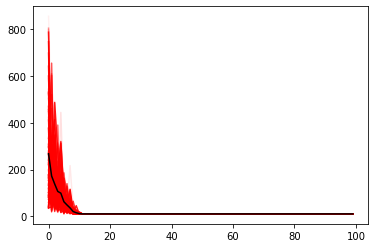

In [ ]:
for i in range(len(l_3_bis)) : 
    plt.plot(np.arange(100), l_3_bis[i] , alpha = i/100 , c = "red")
plt.plot(np.arange(100) , np.array(l_3_bis).mean(axis = 0) , c="black")

Exactly the same , meaning gamma doesn't have an impact. 

In [ ]:
laby2 = labyrinthe.Labyrinthe (filename = 'laby.2', x = 1, y = 1)
random.seed(42)
np.random.seed(42)
l_1 = []
for i in range(50):
    l_1.append(QLearning(laby2)[1])
random.seed(42)
np.random.seed(42)
l_2 = []
for i in range(50):
    l_2.append(QLearning(laby2, gamma = 0.5)[1] ) 
random.seed(42)
np.random.seed(42)
l_3 = []
for i in range(50):
    l_3.append(QLearning(laby2, gamma = 0.1)[1] )  

Text(0.5, 1.0, 'Comparison of minimum number of iteration needed depending on the value of gamma for laby 2')

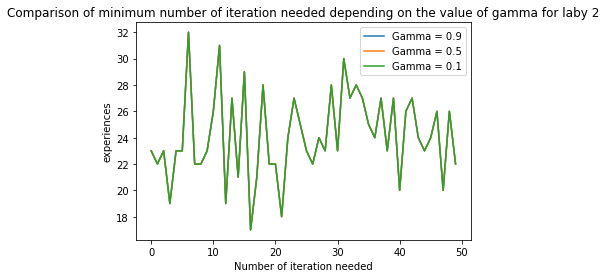

In [ ]:
plt.plot(np.arange(50) , l_1  , label = "Gamma = 0.9")
plt.plot(np.arange(50) , l_2  ,label =  "Gamma = 0.5")
plt.plot(np.arange(50) , l_3  ,label=  "Gamma = 0.1")

plt.legend()

# Add labels to x and y axes
plt.xlabel('Number of iteration needed')
plt.ylabel('experiences')
plt.title("Comparison of minimum number of iteration needed depending on the value of gamma for laby 2")

Gamma doesn't matter because there is only one reward and it doesn't matter if we mulptiply it by something that doesn't change what path is better 

In [9]:
def QLearningbis(lab , tau , gamma = 0.9 , n_iter = 100) : 
    Q = np.zeros((lab.largeur, lab.hauteur, 5))
    n = np.ones(( lab.largeur,lab.hauteur, 5))
    steps = []
    for i in range(n_iter): 
        s = tuple(lab.reset())
        done = False 
        t = 0 
        while  not done : 
            bool_acts , acts =  lab.possible_actions()
            
            qs = np.exp(Q[s[0] , s[1] , acts]/tau)
            probabilities = qs/np.sum(qs)
            act= np.random.choice(acts, p=probabilities)
            
            s_new , r , done , pas = lab.step(act)
            n_step = pas['n']
            s_new = tuple(s_new)
            # quality of current state
            q_s_a=  Q[s[0] , s[1] , act]
            
            
            # alpha 
            alpha = 1/(n[s[0] , s[1] , act] )
            
            
            #quality of next_state
            q_sn_a = np.max(Q[s_new[0] , s_new[1] , :])
            
            # calculation 
            
            q = q_s_a+  alpha  *(r + gamma* q_sn_a - q_s_a)
            
            Q[s[0] , s[1] , act] = q 
            n[s[0] , s[1] , act] = n[s[0] , s[1] , act] + 1
            s = s_new
            t+=1 
            tau = tau * 0.999
        steps.append(n_step)
    return np.argmax(Q , axis = 2 ).T ,np.argmin(np.array(steps)) , steps


In [10]:
random.seed(42)
np.random.seed(42)
l_1 = []
l_1_bis = []
for i in tqdm(range(30)):
    Q = QLearningbis(laby , 100)
    l_1.append(Q[1])
    l_1_bis.append(Q[2])


  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:08<00:00,  3.65it/s]


In [12]:
random.seed(42)
np.random.seed(42)
l_2 = []
for i in range(30):
    l_2.append(QLearningbis(laby, 80 )[1] ) 
    

In [13]:
random.seed(42)
np.random.seed(42)
l_3 = []
for i in range(30):
    l_3.append(QLearningbis(laby, 70)[1] ) 

Text(0.5, 1.0, 'Comparison of minimum number of iteration needed using boltzman depending on the value of tau for laby 1')

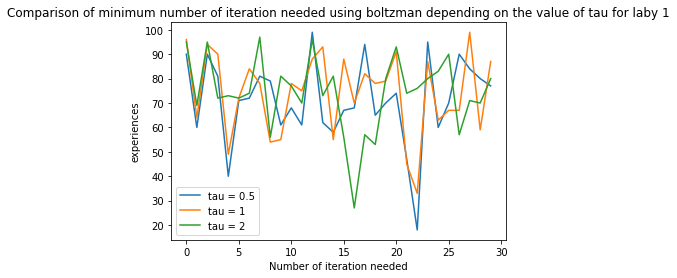

In [14]:
plt.plot(np.arange(30) , l_1  , label = "tau = 0.5")
plt.plot(np.arange(30) , l_2  ,label =  "tau = 1")
plt.plot(np.arange(30) , l_3  ,label=  "tau = 2")

plt.legend()

# Add labels to x and y axes
plt.xlabel('Number of iteration needed')
plt.ylabel('experiences')
plt.title("Comparison of minimum number of iteration needed using boltzman depending on the value of tau for laby 1")

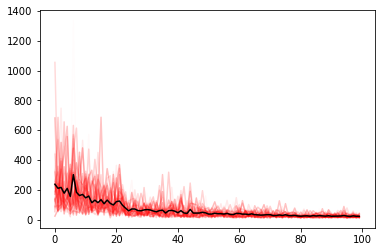

In [15]:
for i in range(len(l_1_bis)) : 
    plt.plot(np.arange(100), l_1_bis[i] , alpha = i/100 , c = "red")
plt.plot(np.arange(100) , np.array(l_1_bis).mean(axis = 0) , c="black")

In [16]:
laby = labyrinthe.Labyrinthe (filename = 'laby.4', x = 1, y = 1)

In [33]:
def QLearning_6(lab ,eps = 1 ,gamma = 0.9 , n_iter = 100)  : 
    Q = np.zeros((lab.largeur, lab.hauteur, 5))
    n = np.zeros(( lab.largeur,lab.hauteur, 5))
    steps = []
    
    for i in tqdm(range(n_iter)): 
        s = tuple(lab.reset())
        done = False 
        t = 0 
        while  not done : 
            r = np.random.rand()
            bool_acts , acts =  lab.possible_actions()
            arr = Q[s[0] , s[1] , : ]
            if r <= eps or arr.sum() == 0  : 
                act = random.choice(acts)
            else : 
                act= np.argmax(arr)
            s_new , r , done , pas = lab.step(act)
            n_step = pas['n']
            s_new = tuple(s_new)
            # quality of current state
            q_s_a=  Q[s[0] , s[1] , act]
            
            
            # alpha 
            alpha = 1/(n[s[0] , s[1] , act]+1 )
            
            
            #quality of next_state
            q_sn_a = np.max(Q[s_new[0] , s_new[1] , :])
            
            # calculation 
            
            q = q_s_a+  1 *(r + gamma* q_sn_a - q_s_a)
            
            Q[s[0] , s[1] , act] = q 
            n[s[0] , s[1] , act] = n[s[0] , s[1] , act] + 1
            s = s_new
            t+=1 
            eps = eps * 0.99999
            
        steps.append(n_step)
        if i == n_iter//3 : 
            laby.set_sortie(14,1)
            
        elif i == 2*n_iter//3 : 
            laby.set_sortie(1,2)

    return np.argmax(Q , axis = 2 ).T ,np.argmin(np.array(steps)) , steps


In [34]:
np.random.seed(42)
random.seed(42)
res = QLearning_6(laby , n_iter = 150 )

100%|██████████| 150/150 [00:00<00:00, 186.21it/s]


In [35]:
len(res[2])

150

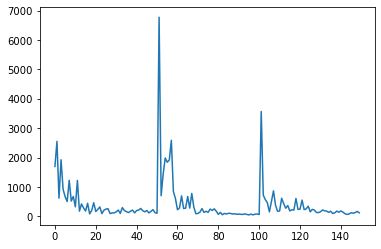

In [36]:
plt.plot(np.arange(150) , res[2])